# 11장
### 11.4
----

### l1, l2, Dropout

----

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def draw_image(img):
    plt.imshow(img, cmap='gray')
    #plt.title(img)
    plt.show()

# [ 0 ] 데이터셋 준비

* MNIST 데이터셋을 불러오세요. tf.keras.datasets.mnist.load_data()를 사용하여 데이터를 적재할 수 있습니다.
* 데이터셋의 차원을 확인해봅시다.

In [2]:
# load
(img, y_train), (img_test, y_test) = tf.keras.datasets.mnist.load_data()
print('* Load')
print('Train set: ', img.shape, img[0][10])
print('Test set: ', img_test.shape, img_test[0][10])

* Load
Train set:  (60000, 28, 28) [  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
Test set:  (10000, 28, 28) [  0   0   0   0   0   0   0   0   0   0   0  17  66  14  67  67  67  59
  21 236 254 106   0   0   0   0   0   0]


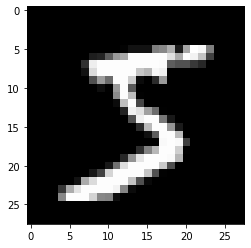

In [3]:
draw_image(img[0])

* 불러온 이미지을 **preProcessing** 함수를 통해 데이터셋으로 전환합시다.

In [66]:
def preProcessing(img, img_test):

    # reshape
    
    x_train = np.reshape(img, (60000, 28*28))
    x_test = np.reshape(img_test, (10000, 28*28))

    print('* Flatten')
    print(x_train.shape, x_train[0][300:328])

    # Normalize
    
    x_train = x_train/255
    x_test = x_test/255
    
    print('* Normailze')
    print(x_train.shape, x_train[0][300:328])
    
    return x_train, x_test

In [67]:
x_train, x_test = preProcessing(img, img_test)

* Flatten
(60000, 784) [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 139 253 190   2   0   0   0   0   0]
* Normailze
(60000, 784) [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.54509804 0.99215686 0.74509804 0.00784314 0.
 0.         0.         0.         0.        ]


----
# [ 1 ]



In [68]:
from tensorflow.keras import layers, models
from functools import partial

def make_model_1():
    Dense = partial(layers.Dense,
               activation='elu',
               kernel_initializer='he_normal',
               )

    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(28*28,)),
        Dense(300),
        Dense(100),
        layers.Dense(10, activation='softmax')
    ])

    model.summary() 
    
    return model

In [83]:
#모델 생성
model_1=make_model_1()

# 모델 컴파일
model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 콜백 선언
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('model_1.h5', save_best_only=True)

# 모델 훈련
model_1.fit(x_train, y_train, 
          validation_split=0.2,
          epochs=10,
          callbacks=[model_checkpoint_cb])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_43 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2418 - accuracy: 0.9259 - val_loss: 0.1320 - val_accuracy: 0.9605
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1056 - accuracy: 0.9671 - val_loss: 0.1156 - val_accuracy: 0.9666
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0762 - accu

----
# [ 2 ] l1 norm

In [84]:
def make_model_2():
    Dense = partial(layers.Dense,
               activation='elu',
               kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l1(0.01)
               )

    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(28*28,)),
        Dense(300),
        Dense(100),
        layers.Dense(10, activation='softmax')
    ])

    model.summary() 

    return model


* 콜백 ModelCheckpoint의 저장 이름을 **2_model.h5**로 바꿉니다.


In [85]:
#모델 생성
model_2=make_model_2()

# 모델 컴파일
model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 콜백 선언
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('model_2.h5', save_best_only=True)

# 모델 훈련
model_2.fit(x_train, y_train, 
          validation_split=0.2,
          epochs=10,
          callbacks=[model_checkpoint_cb])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_46 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 4.8280 - accuracy: 0.7745 - val_loss: 1.3990 - val_accuracy: 0.8436
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3583 - accuracy: 0.8447 - val_loss: 1.2946 - val_accuracy: 0.8570
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2779 - accu

----
# [  3 ]  l2 norm

In [86]:
def make_model_3():
    Dense = partial(layers.Dense,
               activation='elu',
               kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.01)
               )

    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(28*28,)),
        Dense(300),
        Dense(100),
        layers.Dense(10, activation='softmax')
    ])

    model.summary() 
    
    
    return model

* 콜백 ModelCheckpoint의 저장 이름을 **3_model.h5**로 바꿉니다.

In [87]:
#모델 생성
model_3=make_model_3()

# 모델 컴파일
model_3.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 콜백 선언
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('model_3.h5', save_best_only=True)

# 모델 훈련
model_3.fit(x_train, y_train, 
          validation_split=0.2,
          epochs=10,
          callbacks=[model_checkpoint_cb])


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_49 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_50 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.1047 - accuracy: 0.8739 - val_loss: 0.5693 - val_accuracy: 0.8979
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5528 - accuracy: 0.8988 - val_loss: 0.4802 - val_accuracy: 0.9218
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4928 - accu

----
# [  4 ] DropOut

In [88]:
def make_model_4():
    Dense = partial(layers.Dense,
               activation='elu',
               kernel_initializer='he_normal'
               )

    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(28*28,)),
        tf.keras.layers.Dropout(rate=0.2),
        Dense(300),
        tf.keras.layers.Dropout(rate=0.2),
        Dense(100),
        tf.keras.layers.Dropout(rate=0.2),
        layers.Dense(10, activation='softmax')
    ])

    model.summary() 
    
    
    return model

* 콜백 ModelCheckpoint의 저장 이름을 **4_model.h5**로 바꿉니다.


In [89]:
#모델 생성
model_4=make_model_4()

# 모델 컴파일
model_4.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 콜백 선언
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('model_4.h5', save_best_only=True)

# 모델 훈련
model_4.fit(x_train, y_train, 
          validation_split=0.2,
          epochs=10,
          callbacks=[model_checkpoint_cb])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_6 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout_7 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_______________________________________________

# [ 5 ]

* 지금까지 만든 4가지 모델을 불러오고 평가해 봅니다.
* **tf.keras.models.load_model( )**을 통해 모델을 불러올 수 있습니다.
* **model.evaluate( )**를 통해 모든 모델을 평가해 봅니다.
* 불러오기 전에 아래 셀에서 각 모델의 특징을 간단히 메모하세요

* model_1:
* model_2:
* model_3:
* model_4:

In [78]:
# 모델 불러오기 현재 tensorflow 버전에 로드 후 estimate할 때 버그가 있으므로 없애고 바로 평가 
#model_1 = tf.keras.models.load_model('model_1.h5')
#model_2 = tf.keras.models.load_model('model_2.h5')
#model_3 = tf.keras.models.load_model('model_3.h5')
#model_4 = tf.keras.models.load_model('model_4.h5')


In [90]:
# 모델 평가

model_1.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.9776


[0.11001980304718018, 0.9775999784469604]

In [91]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.0769 - accuracy: 0.8794


[1.076857089996338, 0.8794000148773193]

In [92]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.9383


[0.36992308497428894, 0.9383000135421753]

In [93]:
model_4.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0730 - accuracy: 0.9787


[0.07298269122838974, 0.9786999821662903]